# Problem Set #1

**Computational Electromagnetism and Applications (ΥΦΥ203)**

Implemented by: **Anastasios-Faidon Retselis (AEM: 4394)**

# Exercise 1.1

## Problem Statement

Η αριθμητική ταχύτητα φάσης στον ελεύθερο χώρο της λύσης της διακριτής μονοδιάστατης κυματικής εξίσωσης δίνεται από τη σχέση:

$$
v_{p}=\omega / \tilde{k}=\frac{2 \pi c}{\cos ^{-1}\left\{\frac{\Delta x^{2}}{(c \Delta t)^{2}}[\cos (\omega \Delta t)-1]+1\right\}} \frac{\Delta x}{\lambda_{o}}
$$

Σχεδιάστε τον λόγο της αριθμητικής προς την αναλυτική ταχύτητα φάσης (βλ. διαφάνεια 2-12 του S. Gedney) ως συνάρτηση του λόγου Δx/λ για (α) c Δt =Δx/2 και (β) c Δt = Δx/4.

## Solution

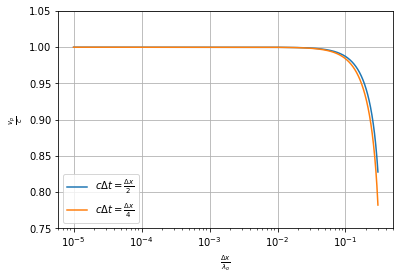

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Case a: cΔt=Δx/2

# x_values correspond to Δx/λ_ο
x_values = np.linspace(0.00001,0.3,10000)
# y_values correspond to v_ph/c

# Case a: cΔt=Δx/2
y_values = 2*np.pi/(np.arccos(4*(np.cos(np.pi*x_values)-1)+1))*x_values
plt.semilogx(x_values, y_values,label=r'$c\Delta t=\frac{\Delta x}{2}$')
plt.ylim(0,1.2)

# Case b: cΔt=Δx/4
y_values = 2*np.pi/(np.arccos(16*(np.cos(np.pi*x_values/2)-1)+1))*x_values
plt.semilogx(x_values, y_values,label=r'$c\Delta t=\frac{\Delta x}{4}$')
plt.legend()
plt.ylim(0.75,1.05)
plt.xlabel(r'$\frac{\Delta x}{\lambda_{o}}$')
plt.ylabel(r'$\frac{v_{p}}{c}$')
plt.grid()
plt.show()

# Exercise 1.2

## Problem Statement

Text goes here

## Solution

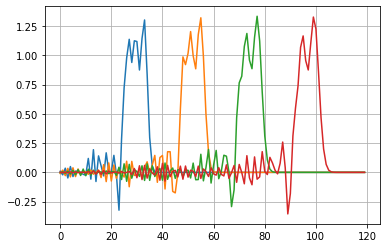

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def initial_conditions(array):
    # Defines initial conditions for the problem
    # Input is a 2D array
    # Output is the 2D array with the applied initial/boundary conditions
    lower_limit = 2
    upper_limit = 11
    for i in range(lower_limit-1,upper_limit):
        array[0][i] = 1
        array[1][i+1] = 1
    return(array)

def solve_1D_FDTD_stencil(u, dx, dt):
    # Solves the 1D FTDRD Stencil
    # Input is the grid in form of a 2D array w/ initial+boundary conditions
    # Output is the grid
    for n in range(1, size-1):
        for i in range(0, size-1):
            u[n+1][i] = pow(c*dt, 2)*((u[n][i+1]-2*u[n][i]+u[n][i-1])/pow(dx,2)) + 2*u[n][i] - u[n-1][i]
    return(u)

def plot_frame(array, i):
    # Extract frames from an array and plots them
    # Note that with this convention we have if we request frame number i the index of the frame is i+2
    frame = array[i+2,:]
    plt.plot(frame)
    
size = 120
c = 1
u_case2 = np.zeros((size, size))
u_case3 = np.zeros((size, size))

# Case 1
dx = 0.1
dt = 0.9*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = solve_1D_FDTD_stencil(u, dx, dt)

# Extract and plot frames for case 1

plt.figure()
plot_frame(u, 25)
plot_frame(u, 50)
plot_frame(u, 75)
plot_frame(u, 100)
plt.grid()
plt.show()

